# Group Homework Week 2.1
CUNY Data 620 - Web Analytics, Summer 2018 <br>
__Prof:__  Alain Ledon <br>
__Members:__ Andrew Carson, Nathaniel Cooper, Eleanor Romero-Secoquian, Walt Wells

In [1]:
import os.path
import gzip
import csv
import networkx as net
import urllib
import matplotlib.pyplot as plt

% matplotlib inline

##  The Data

#### Source Library
SNAP: A General-Purpose Network Analysis and Graph-Mining Library, _Jure Leskovec and Andrej Krevl_; June 2014; http://snap.stanford.edu/data <br>

#### Datset
This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks. <br>
https://snap.stanford.edu/data/egonets-Facebook.html

#### Dataset Source
J. McAuley and J. Leskovec. Learning to Discover Social Circles in Ego Networks. NIPS, 2012.<br>
http://i.stanford.edu/~julian/pdfs/nips2012.pdf

In [3]:
def makeGraph():
    # create graph from gz file
    g = net.Graph(name="Facebook")
    in_file = gzip.open('facebook_combined.txt.gz', 'r')
    f = csv.reader(in_file, delimiter=' ')
    try:
        for line in f:
            g.add_edge(line[0], line[1])
    finally:
        in_file.close()
    return g

In [4]:
if os.path.exists('facebook_combined.txt.gz'):
    print "Extracting..."
    g = makeGraph()
else: 
    print "Retrieving and Extracting..."
    fileloc = urllib.URLopener()
    fileloc.retrieve("https://snap.stanford.edu/data/facebook_combined.txt.gz", "facebook_combined.txt.gz")
    g = makeGraph()

Retrieving and Extracting...


## Basic Analysis

In [5]:
print(net.info(g))

Name: Facebook
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


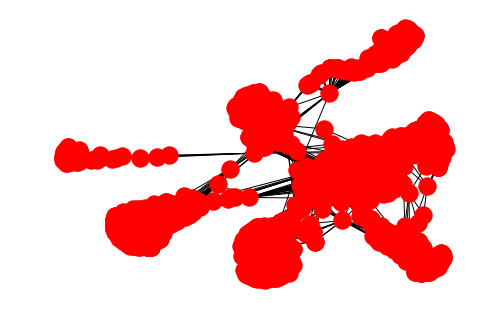

In [9]:
net.draw(g, pos=net.spring_layout(g))

In [10]:
net.diameter(g)

8

In [19]:
deg = net.degree(g)
deg = dict(list(deg))

In [22]:
print "min degree value: ", min(deg.values())
print "max degree value: ", max(deg.values())

min degree value:  1
max degree value:  1045


In [47]:
ds = sorted(deg.iteritems(), key=lambda(k,v): (-v,k))
print "Top 10 FB Degrees"
ds[0:10]

Top 10 FB Degrees


[('107', 1045),
 ('1684', 792),
 ('1912', 755),
 ('3437', 547),
 ('0', 347),
 ('2543', 294),
 ('2347', 291),
 ('1888', 254),
 ('1800', 245),
 ('1663', 235)]

Text(0.5,1,'Hist of FB Degress < Top 10')

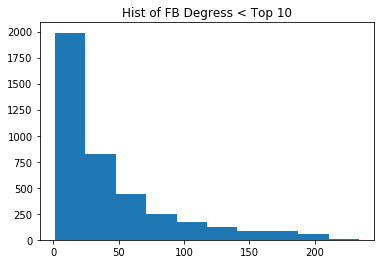

In [46]:
plt.hist([x[1] for x in ds[11:len(ds)]])
plt.title("Hist of FB Degress < Top 10")

### Save for review in Gephi

In [14]:
net.write_gexf(g, 'fb.gexf')

### Gephi Depiction of Network

![FB](FB.png)